# Aadhar Demographic Data EDA

This notebook performs Exploratory Data Analysis on the Aadhar Demographic dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

plt.style.use('ggplot')
sns.set_palette("viridis")

In [2]:
# Load Data
folder_path = '../api_data_aadhar_demographic/api_data_aadhar_demographic/'
all_files = glob.glob(os.path.join(folder_path, "*.csv"))

df_list = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    df_list.append(df)

if df_list:
    df_demo = pd.concat(df_list, axis=0, ignore_index=True)
    print(f"Loaded {len(df_list)} files. Total rows: {len(df_demo)}")
else:
    print("No files found!")

Loaded 5 files. Total rows: 2071700


In [3]:
df_demo.head()

,date,state,district,pincode,demo_age_5_17,demo_age_17_
0,01-03-2025,Uttar Pradesh,Gorakhpur,273213,49,529
1,01-03-2025,Andhra Pradesh,Chittoor,517132,22,375
2,01-03-2025,Gujarat,Rajkot,360006,65,765
3,01-03-2025,Andhra Pradesh,Srikakulam,532484,24,314
4,01-03-2025,Rajasthan,Udaipur,313801,45,785


In [4]:
df_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2071700 entries, 0 to 2071699
Data columns (total 6 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   date           object
 1   state          object
 2   district       object
 3   pincode        int64 
 4   demo_age_5_17  int64 
 5   demo_age_17_   int64 
dtypes: int64(3), object(3)
memory usage: 94.8+ MB


## Data Cleaning and Preprocessing

In [5]:
# Convert date to datetime
df_demo['date'] = pd.to_datetime(df_demo['date'], format='%d-%m-%Y', errors='coerce')

# Check for nulls
print(df_demo.isnull().sum())

date             0
state            0
district         0
pincode          0
demo_age_5_17    0
demo_age_17_     0
dtype: int64


## Exploratory Analysis

In [6]:
# Descriptive Statistics
df_demo.describe()

,date,pincode,demo_age_5_17,demo_age_17_
count,2071700,2.071700e+06,2.071700e+06,2.071700e+06
mean,2025-11-02 19:25:06.470627840,5.278318e+05,2.347552e+00,2.144701e+01
min,2025-03-01 00:00:00,1.000000e+05,0.000000e+00,0.000000e+00
25%,2025-10-15 00:00:00,3.964690e+05,0.000000e+00,2.000000e+00
50%,2025-11-08 00:00:00,5.243220e+05,1.000000e+00,6.000000e+00
75%,2025-12-06 00:00:00,6.955070e+05,2.000000e+00,1.500000e+01
max,2025-12-29 00:00:00,8.554560e+05,2.690000e+03,1.616600e+04
std,NaN,1.972933e+05,1.490355e+01,1.252498e+02


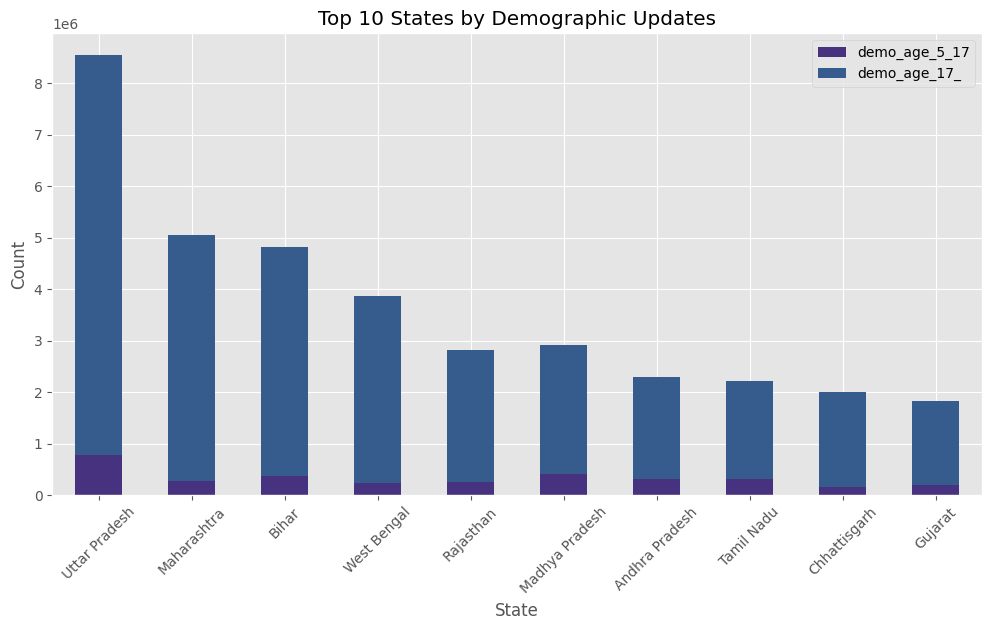

In [7]:
# Demographic Updates by State
state_groups = df_demo.groupby('state')[['demo_age_5_17', 'demo_age_17_']].sum().sort_values(by='demo_age_17_', ascending=False).head(10)

state_groups.plot(kind='bar', figsize=(12, 6), stacked=True)
plt.title('Top 10 States by Demographic Updates')
plt.ylabel('Count')
plt.xlabel('State')
plt.xticks(rotation=45)
plt.show()

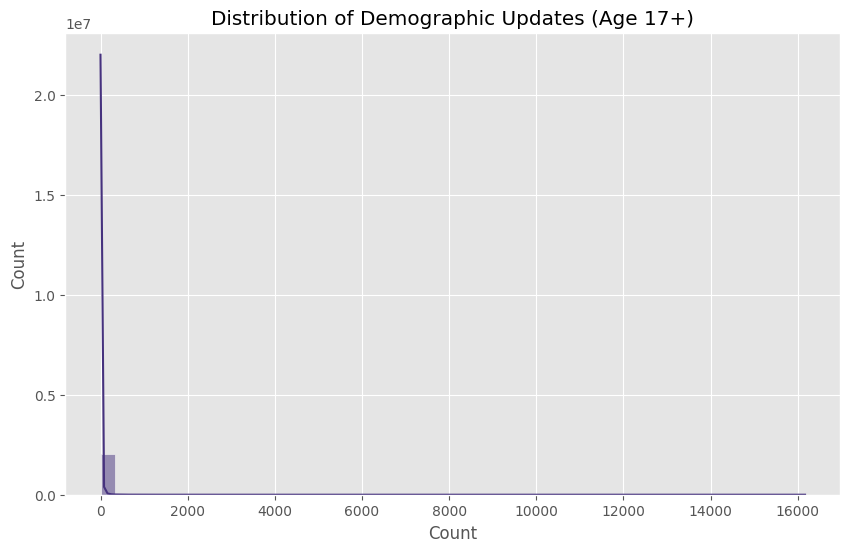

In [8]:
# Distribution of Updates for Age 17+
plt.figure(figsize=(10, 6))
sns.histplot(df_demo['demo_age_17_'], bins=50, kde=True)
plt.title('Distribution of Demographic Updates (Age 17+)')
plt.xlabel('Count')
plt.show()

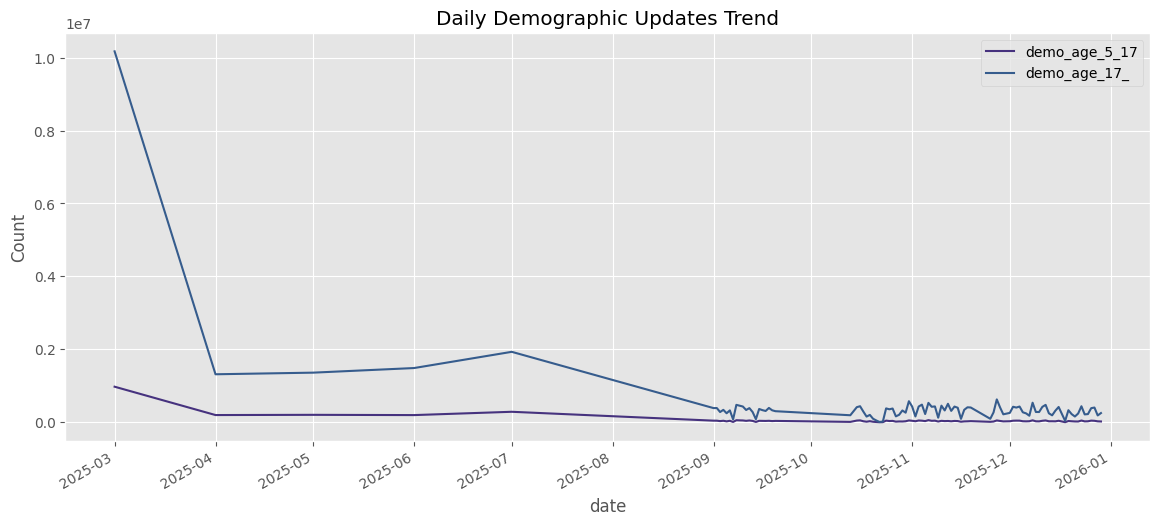

In [9]:
# Time Series Analysis
daily_trend = df_demo.groupby('date')[['demo_age_5_17', 'demo_age_17_']].sum()
daily_trend.plot(figsize=(14, 6))
plt.title('Daily Demographic Updates Trend')
plt.ylabel('Count')
plt.show()